## FFNN Regression of Franke function data

In this notebook we use the final FFNN regression class made by us to answer task B and C in project 2. Results are just presented here, discussed in report.

In [8]:
### Imports

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Self-made imports, see 'misc code' on GitHub
# (https://github.com/lassetotl/fys-stk/tree/main/project%202)
from p2_functions import MSE, FrankeFunction, create_X, sigmoid, RELU
from FFNN_classes import FFNN_Regression

np.random.seed(0)

### Preparing data, initializing FFNN regressors

In [9]:
# Noisy Franke plot from Project 1
z = np.load('FrankeDataP1.npy')
# Design matrix for 5th degree polynomial fit
X = np.load('5thDesignX_P1.npy')
# xy meshgrid corresponding to z
XY = np.load('franke_mesh.npy')
#XY_ = XY[0] + XY[1]

# We split the data in training (80%) and test (20%) data
X_train, X_test, z_train, z_test = train_test_split(X, z.ravel().reshape(-1,1), test_size=0.2)
print(f'z_train shape: {np.shape(z_train)}')
print(f'X_train shape: {np.shape(X_train)}')

# Initialize regression instances (run to reset weights)
rnn1 = FFNN_Regression(X_train, z_train, eta = 0.01, lmbd = 0, epochs = 100, activation = 'Sigmoid')
rnn2 = FFNN_Regression(X_train, z_train, eta = 3, lmbd = 0, epochs = 5000, activation = 'RELU')
rnn3 = FFNN_Regression(X_train, z_train, eta = 3, lmbd = 0, epochs = 5000, activation = 'Leaky RELU')

z_train shape: (1280, 1)
X_train shape: (1280, 21)


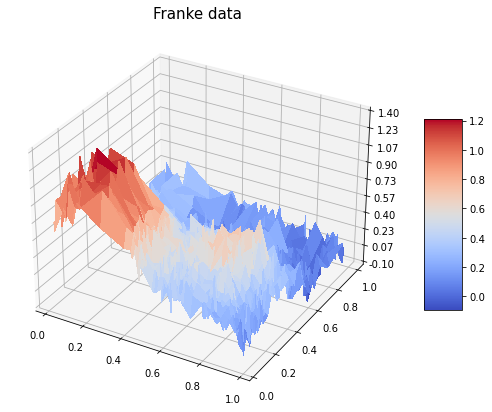

In [10]:
# Plotting the generated data 'z'
fig = plt.figure(figsize = (13, 7)) 
ax = fig.add_subplot(projection='3d') #

surf = ax.plot_surface(XY[0], XY[1], z, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Franke data', fontsize = 15)
plt.show()

### Evaluating different activation functions

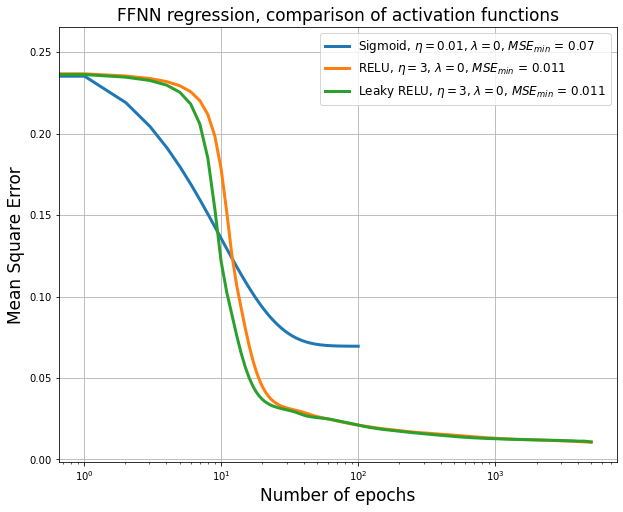

In [11]:
## Plotting MSE for each epoch 
fig = plt.figure(figsize = (10, 8))
plt.title('FFNN regression, comparison of activation functions', fontsize = 17)
plt.xlabel('Number of epochs', fontsize = 17)
plt.ylabel('Mean Square Error', fontsize = 17)

# epoch array, error, score, last output
e1, m1, r1, z1 = rnn1.train()
e2, m2, r2, z2 = rnn2.train()
e3, m3, r3, z3 = rnn3.train()

plt.xscale('log'); plt.grid(1)
plt.legend(prop={'size': 12})#; plt.savefig('FFNN1')
plt.show()

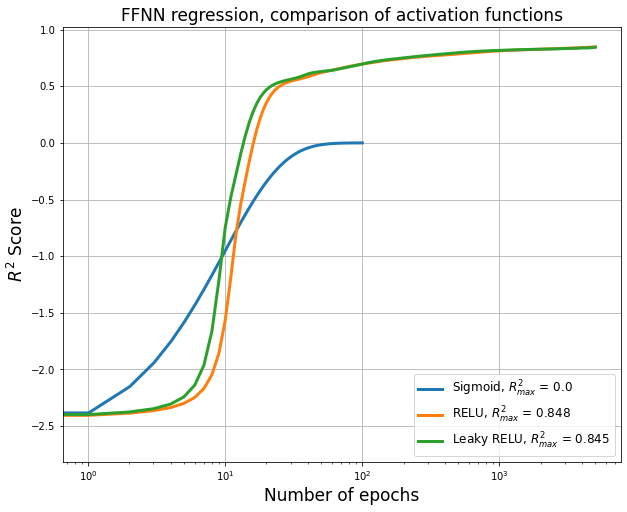

In [12]:
## Plotting score R2 for every epoch
fig = plt.figure(figsize = (10, 8))
plt.title('FFNN regression, comparison of activation functions', fontsize = 17)
plt.xlabel('Number of epochs', fontsize = 17)
plt.ylabel('$R^2$ Score', fontsize = 17)
plt.plot(e1, r1, lw = 3, label = ('Sigmoid, $R^2_{max}$ = ' + str(round(np.max(r1), 3))))
plt.plot(e2, r2, lw = 3, label = ('RELU, $R^2_{max}$ = ' + str(round(np.max(r2), 3))))
plt.plot(e3, r3, lw = 3, label = ('Leaky RELU, $R^2_{max}$ = ' + str(round(np.max(r3), 3))))

plt.xscale('log'); plt.grid(1)
plt.legend(prop={'size': 12})#; plt.savefig('r2')
plt.show()

### Final output of network

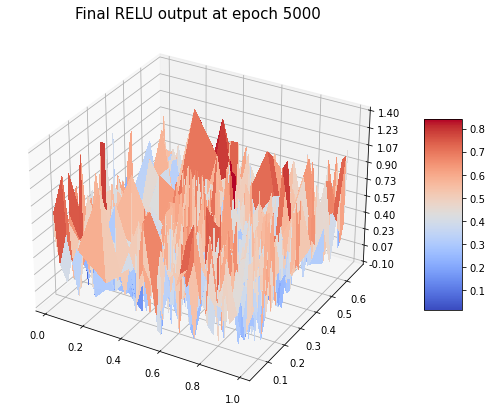

In [24]:
# Plotting the generated data 'z'
fig = plt.figure(figsize = (13, 7)) 
ax = fig.add_subplot(projection='3d') #

surf = ax.plot_surface(XY[0, :32], XY[1, :32], z2.reshape(32,40), cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(f'Final RELU output at epoch {len(e2)}', fontsize = 15)
plt.show()

This is a poor reconstruction, probably because of poor data management. We won't spend more time trying to fix this.

### Hyperparameter analysis

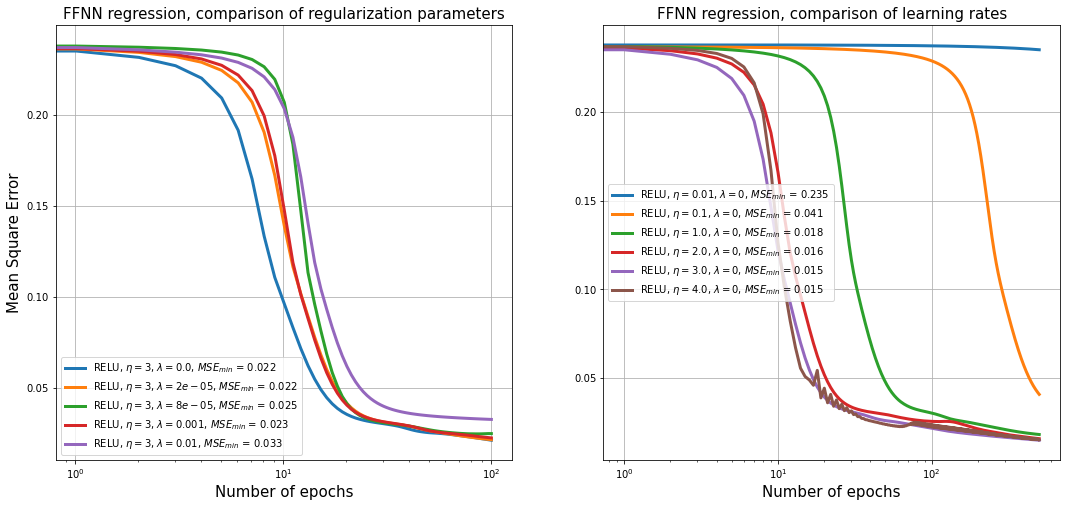

In [14]:
# Plot network selection with constant eta, relu activation
fig = plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
plt.title('FFNN regression, comparison of regularization parameters', fontsize = 15)
plt.xlabel('Number of epochs', fontsize = 15)
plt.ylabel('Mean Square Error', fontsize = 15)

lambd = np.array([0, 0.00002, 0.00008, 0.001, 0.01, 0.1])
for i in range(5):
    rnn = FFNN_Regression(X_train, z_train, eta = 3, lmbd = lambd[i], epochs = 100, activation = 'RELU')
    rnn.train()
    
plt.xscale('log'); plt.grid(1)
plt.legend(prop={'size': 10})

# Plot networks with constant lambda
plt.subplot(1, 2, 2)
plt.title('FFNN regression, comparison of learning rates', fontsize = 15)
plt.xlabel('Number of epochs', fontsize = 15)
#plt.ylabel('Mean Square Error', fontsize = 15)

eta = np.array([0.01, 0.1, 1, 2, 3, 4])
for i in range(len(eta)):
    rnn = FFNN_Regression(X_train, z_train, eta = eta[i], lmbd = 0, epochs = 500, activation = 'RELU')
    rnn.train()
    
plt.xscale('log'); plt.grid(1)
plt.legend(prop={'size': 10})#; plt.savefig('Parameters')
plt.show()

### Building the network with scikit-learn method

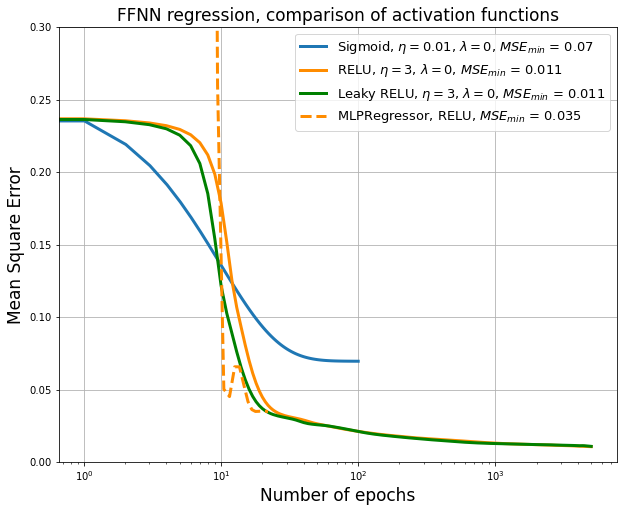

In [15]:
from sklearn.neural_network import MLPRegressor
# MLP = Multi-Layer Perceptron
# run this block to reset dnn object

import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

n_hidden_neurons = 20
epochs = 1000
# activation; ‘identity’, ‘logistic’ (sigmoid), ‘tanh’, ‘relu’
dnn = MLPRegressor(hidden_layer_sizes=n_hidden_neurons, activation='relu', early_stopping = False, 
                    alpha=0, learning_rate_init=3, max_iter=epochs, verbose = False, shuffle = False,
                  tol = 0.01, solver = 'adam', random_state = 0, n_iter_no_change = 10)

dnn.fit(X_train, z_train.ravel())

# Compare with the result of our own script

loss = getattr(dnn, 'loss_curve_')
itr = getattr(dnn, 'n_iter_')

epoch = np.linspace(0, itr, itr)

# Comparing loss with our own code
fig = plt.figure(figsize = (10, 8))
plt.title('FFNN regression, comparison of activation functions', fontsize = 17)
plt.xlabel('Number of epochs', fontsize = 17)
plt.ylabel('Mean Square Error', fontsize = 17)

plt.plot(e1, m1, lw = 3, label = 'Sigmoid, $\eta = 0.01$, $\lambda = 0$, '+'$MSE_{min}$ = '+f'{round(np.min(m1),3)}')
plt.plot(e2, m2, 'darkorange', lw = 3, label = 'RELU, $\eta = 3$, $\lambda = 0$, '+'$MSE_{min}$ = '+f'{round(np.min(m2),3)}')
plt.plot(e3, m3, 'g', lw = 3, label = 'Leaky RELU, $\eta = 3$, $\lambda = 0$, '+'$MSE_{min}$ = '+f'{round(np.min(m3),3)}')

plt.plot(epoch, loss, 'darkorange', lw = 3, ls = '--', 
         label = 'MLPRegressor, RELU, '+'$MSE_{min}$ = '+f'{round(np.min(loss),3)}')


plt.ylim(0, 0.3)
plt.xscale('log'); plt.grid(1)
plt.legend(prop={'size': 13})#; plt.savefig('FFNN3')
plt.show()